# Google Colabチートシート

## 1. 実行 (Run)

カーソルがどこにあっても機能します。

| 動作 | ショートカット | 挙動のポイント |
| :--- | :--- | :--- |
| **実行して次のセルへ** | **`⇧` + `Enter`** | 基本操作。次がなければ作成します。 |
| **実行してその場に留まる** | **`⌘` + `Enter`** | 出力結果だけ確認したい時に。 |
| **実行して下にセルを挿入** | **`⌥` + `Enter`** | 常に新しいセルを下に作りたい時。 |
| **実行の中断** | **`⌘` + `M`** → **`I`** | 無限ループや重い処理を止める時。 |

## 2. セルの管理・操作 (Command Mode)

**`⌘ + M` を押した後に、別のキーを押す** 2段階操作です。
（※ `Esc` を押して入力モードを抜けてから行うと確実です）

| 動作 | ショートカット | 覚え方 |
| :--- | :--- | :--- |
| **上にコードセルを追加** | **`⌘` + `M`** → **`A`** | **A**bove (上) |
| **下にコードセルを追加** | **`⌘` + `M`** → **`B`** | **B**elow (下) |
| **セルの削除** | **`⌘` + `M`** → **`D`** | **D**elete |
| **セルの削除を取り消す** | **`⌘` + `M`** → **`Z`** | Undo (Z) |
| **テキスト(Markdown)に変換** | **`⌘` + `M`** → **`M`** | **M**arkdown |
| **コードセルに変換** | **`⌘` + `M`** → **`Y`** | p**Y**thon |
| **セルを上に移動** | **`⌘` + `M`** → **`K`** | Vim操作 (K=上) |
| **セルを下に移動** | **`⌘` + `M`** → **`J`** | Vim操作 (J=下) |

## 3. エディタ内での操作 (Edit Mode)

セルの中（緑色の枠）でコードを書いている時の操作です。

| 動作 | ショートカット | 備考 |
| :--- | :--- | :--- |
| **コード補完** | **`⌃` + `Space`** | ※Spotlight競合回避のため `Control` を使用 |
| **ドキュメント表示** | 関数上でホバー または **`Tab`** | 引数の確認などに |

## 4. その他・便利なナビゲーション

| 動作 | ショートカット | 備考 |
| :--- | :--- | :--- |
| **コマンドパレット** | **`⌘` + `⇧` + `P`** | 全機能を検索・実行可能 |
| **ショートカット一覧** | **`⌘` + `M`** → **`H`** | 設定変更もここから |
| **前のセルを選択** | **`esc` → `↑`** | **P**revious |
| **次のセルを選択** | **`esc` → `↓`** | **N**ext |

# 技術検証

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# 必要なライブラリのインストール
!pip install -q ultralytics opencv-python-headless google-generativeai matplotlib

## 画像検出 by YOLO-World (Ultralytics)

In [34]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [35]:
# 1. モデルのロード
model = YOLO('yolov8s-worldv2.pt')

In [46]:
# 2. クラス・モデルの設定
# テキストプロンプトで探索。単語を`,`区切りの配列として与える。
object_search = ["one card"]
model.set_classes(object_search)

# カスタムモデルとして保存しmodelを上書き
# model.save("custom_yolov8s.pt")
# model = YOLO("custom_yolov8s.pt")
  # NOTE: 事前にembeddingを実行しておけるなど性能面のメリットがある。
  # QUESTION: 精度面のメリットもあるようだが、なぜかは不明
  # https://docs.ultralytics.com/models/yolo-world/#benefits-of-saving-with-custom-vocabulary

In [49]:
# 3. 推論実行
# 各種設定
# FOLDER_PATH="./drive/MyDrive/50_アウトプット/pokeapp/docs/study/画像認識検証/テストデータ/" # 画像格納したフォルダ名
IMAGE_NAME = "/content/drive/MyDrive/50_アウトプット/pokeapp/docs/study/画像認識検証/モンキーテスト/original_hajime_202512270105.jpg"
# IMAGE_PATH= FOLDER_PATH + IMAGE_NAME  # 画像名
IMAGE_PATH= IMAGE_NAME  # 画像名
CONF = 0.014 # 検出スコアの閾値 (0.0～1.0)
  # NOTE: 値が低いほど物体を検知しやすくなる
  # 最初は低めに設定して取り漏らしを防ぐ
IOU = 0.1 # IoUの閾値 (0.0～1.0)
  # NOTE: 値が低いほど、物体の重複を許容しなくなしなくなり、検出数が減る。
  # 最初は高めに設定して取り漏らしを防ぐ
IMGSZ = (640) # モデル入力時の画像サイズ
  # NOTE: 画像ファイルのサイズと異なる場合は、リサイズされる
  # 学習時と推論時で同じサイズにすることが望ましいらしい
MAX_DET = 30 # 画像あたりの最大検出数
  # NOTE: 密集した状態での過剰な検出を防ぐもの。
  # 今回は物体検出の目的だけなら設定しなくても良いかもしれないが、後続アプリ機能との整合性のために指定した方が良いと思う

# 推論実行
results = model.predict(
    IMAGE_PATH,
    conf = CONF,
    iou = IOU,
    imgsz = IMGSZ,
    max_det = MAX_DET
)


image 1/1 /content/drive/MyDrive/50_アウトプット/pokeapp/docs/study/画像認識検証/モンキーテスト/original_hajime_202512270105.jpg: 320x640 4 one cards, 901.2ms
Speed: 4.5ms preprocess, 901.2ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


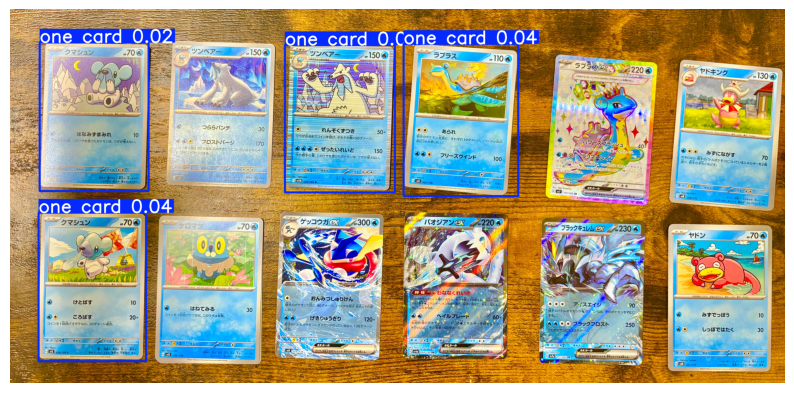

In [50]:
# 4. 結果の可視化
result_img = results[0].plot()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# 5. 結果の保存
# 出力ファイル名確認
print(IMAGE_NAME)

ACE SPEC.jpg


In [ ]:
# 必要に応じてIMAGE_NAMEを上書き
# IMAGE_NAME=".JPG"
# 各種設定
OUTPUT_DIR = "./drive/MyDrive/50_アウトプット/pokeapp/docs/study/画像認識検証/result_1_画像検出/"
FILENAME = "one card_" + IMAGE_NAME
OUTPUT_FILENAME = OUTPUT_DIR + FILENAME

# 画像をファイルに保存
cv2.imwrite(OUTPUT_FILENAME, result_img)
print(f"Detection results saved to {OUTPUT_FILENAME}")

Detection results saved to ./drive/MyDrive/50_アウトプット/pokeapp/docs/study/画像認識検証/result_1_画像検出/one card_ACE SPEC.jpg


## 画像前処理 by OpenCV

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. 処理関数定義
def create_grid_image(original_img, boxes, target_size=(224, 300)):
    """
    検出されたボックスをクロップし、リサイズしてグリッド状に結合する
    """
    cropped_images = []

    # 座標でループ処理
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = original_img[y1+25:y2-50, x1+50:x2-50]
          # NOTE: 検出スコアや矩形線が画像に映り込まないよう、上下左右端を切り取り

        # サイズを統一 (Geminiが見やすいようにリサイズ)
        crop_resized = cv2.resize(crop, target_size)
        cropped_images.append(crop_resized)

    # グリッド計算 (例えば横5列)
    cols = 5
    rows = (len(cropped_images) + cols - 1) // cols

    # キャンバス作成 (黒背景)
    grid_h = rows * target_size[1]
    grid_w = cols * target_size[0]
    grid_img = np.zeros((grid_h, grid_w, 3), dtype=np.uint8)

    # 画像を配置
    for idx, img in enumerate(cropped_images):
        r = idx // cols
        c = idx % cols
        y_offset = r * target_size[1]
        x_offset = c * target_size[0]
        grid_img[y_offset:y_offset+target_size[1], x_offset:x_offset+target_size[0]] = img

    return grid_img, len(cropped_images), cropped_images

In [ ]:
# 2. 処理設定
# 読み込みファイル名確認
print(OUTPUT_FILENAME)

./drive/MyDrive/50_アウトプット/pokeapp/docs/study/画像認識検証/result_1_画像検出/one card_ACE SPEC.jpg


In [ ]:
# 必要に応じてファイル名上書き
# OUTPUT_FILENAME = ""
# 変数設定
orig_img = cv2.imread(OUTPUT_FILENAME)
boxes = results[0].boxes

In [ ]:
# 3. 処理実行
grid_image, count, individual_cropped_images = create_grid_image(orig_img, boxes)

検出枚数: 5枚


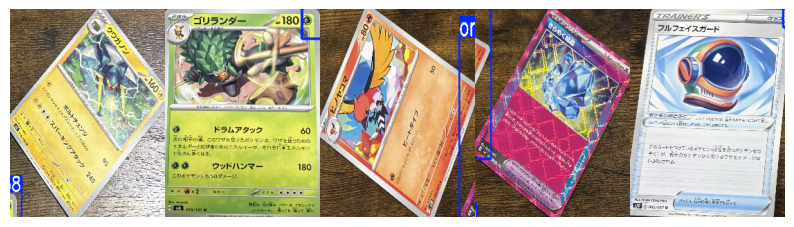

In [ ]:
# 4. 処理結果確認
## grid_image
print(f"検出枚数: {count}枚")
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# # 検出された個々のクロップ画像を一枚ずつ表示
# for i, img in enumerate(individual_cropped_images):
#     plt.figure(figsize=(5, 5))
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.title(f"Cropped Image {i+1}")
#     plt.axis('off')
#     plt.show()

In [ ]:
# 5. 処理結果保存
# 出力ファイル名確認
print(FILENAME)

one card_ACE SPEC.jpg


In [ ]:
# 必要に応じてファイル名上書き
# FILENAME = "card_.jpg"
# 各種設定
OUTPUT_DIR = "./drive/MyDrive/50_アウトプット/pokeapp/docs/study/画像認識検証/result_2_画像前処理/"
OUTPUT_FILENAME = OUTPUT_DIR + FILENAME

# grid_imageをファイルに保存
cv2.imwrite(OUTPUT_FILENAME, grid_image)
print(f"Detection results saved to {OUTPUT_FILENAME}")

Detection results saved to ./drive/MyDrive/50_アウトプット/pokeapp/docs/study/画像認識検証/result_2_画像前処理/one card_ACE SPEC.jpg


## 生成AI解析 by Gemini

> [!WARNING]
> 実際の開発時には `Google AI Atudio`でAPIの用意が必要。
> 今後そのパターンの技術検証も実施予定。使えるモデルが異なる可能性があるため。

In [19]:
import google.generativeai as genai
import json
from google.colab import userdata

In [20]:
# 1. APIの設定
# GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')
GOOGLE_API_KEY = userdata.get('SPARE_API')
genai.configure(api_key=GOOGLE_API_KEY)

# 利用可能なモデル確認
# for m in genai.list_models():
#   print(m)

In [30]:
# 2. モデルとプロンプト準備
model = genai.GenerativeModel('gemini-2.5-flash-lite')
PROMPT = """
あなたはポケモンカードと画像解析の専門家です。
    添付画像は、**赤字のID番号**に従って、ポケモンカードに限らず、長方形の画像要素をgrid形式で並べたものです。
    画像内の**赤字でidが振られた長方形要素**を**必ず左上から右下へ順に**読み取り、以下のJSON配列形式のみを出力してください。
    画像品質が悪くても推測して補完してください。
    Markdown記法は一切含めないでください。
    **idは必ず0始まりとしてください**

    # データ定義
    - 全ての項目は必須です。値がない場合は `null` (文字列, 数値) または `[]` (配列)、`false` (真偽値)、を使用してください。
    - `id`: 画像内の**赤字のid**
    - `category`: "pokemon", "trainers", "Other" (ポケモンカード以外の場合)
    - `trainer_type`: "グッズ", "サポート", "スタジアム", "ポケモンのどうぐ" (pokemon/Otherの場合は null)
    - `special_trainers`: `category`が"trainers"でカード色が蛍光ピンクの場合のみ"ACE SPEC"
    - `evolves_from`, `evolution_stage`: Pokemonの進化元・進化段階を表す。カード右上に記載されていることが多い。**画像品質が悪くても推測して補完**すること。
    - `special_features`: Pokemonの特殊分類("ポケモンex", "テラスタル"等)。trainers/Otherの場合は null
    - `hp`, `type`, `move_types`: Pokemonの属性。trainers/Otherの場合は [] (空配列)。同一types, move_typesは一度のみ記載。
    - `weakness`, `resistance`: Pokemonの属性。trainers/Otherの場合は [] (空配列)。カード下部に記載されていることが多い。
    - `retreat_cost`: Pokemonの属性で、にげるためのコストを指す。trainers/Otherの場合は"null"。カード右下に星マークの数として記載される。


    # 出力例
    [
    {
        "id": 0,
        "category": "pokemon",
        "name": "リザードンex",
        "trainer_type": null,
        "special_trainers": false,
        "evolves_from": "リザード",
        "evolution_stage": "2進化",
        "special_features": ["ポケモンex", "テラスタル"],
        "type": ["悪"],
        "move_types": ["炎", "無色"],
        "weakness": ["草"].
        "resistance": ["水"],
        "retreat_cost": 2,
        "hp": 170
    },
    {
        "id": 1,
        "category": "trainers",
        "name": "プライムキャッチャー",
        "trainer_type": "グッズ",
        "is_ace_spec": true,
        "evolves_from": null,
        "evolves_stage": null,
        "special_features": null,
        "type": [],
        "move_types": [],
        "weakness": [],
        "resistance": [],
        "retreat_cost": null,
        "hp": null
    },
    {
        "id": 2,
        "category": "Other",
        "name": null,
        "trainer_type": null,
        "special_trainers": false,
        "evolves_from": null,
        "evolves_stage": null,
        "special_features": null,
        "type": [],
        "move_types": [],
        "weakness": [],
        "resistance": [],
        "retreat_cost": null,
        "hp": null
    }
    ]
"""

In [ ]:
# 3. 画像準備
# 設定されている画像パスの確認
print(OUTPUT_FILENAME)

./drive/MyDrive/50_アウトプット/pokeapp/docs/study/画像認識検証/result_2_画像前処理/one card_ACE SPEC.jpg


In [22]:
# 必要に応じてファイルパスの上書き
# OUTPUT_FILENAME = ".jpg"
# 画像ファイルの取得
IMG = genai.upload_file(path="/content/drive/MyDrive/50_アウトプット/pokeapp/docs/study/画像認識検証/モンキーテスト/grid_amane_202512270033.jpg", display_name="Pokemon Cards Grid")

In [31]:
# 4. 処理実行
response = model.generate_content([PROMPT, IMG])
# 結果表示
print(response.text)

[
    {
        "id": 0,
        "category": "pokemon",
        "name": "エレブー",
        "trainer_type": null,
        "special_trainers": false,
        "evolves_from": null,
        "evolution_stage": "1進化",
        "special_features": [],
        "type": ["雷"],
        "move_types": ["雷"],
        "weakness": ["闘"],
        "resistance": [],
        "retreat_cost": 2,
        "hp": 90
    },
    {
        "id": 1,
        "category": "pokemon",
        "name": "エレブー",
        "trainer_type": null,
        "special_trainers": false,
        "evolves_from": null,
        "evolution_stage": "1進化",
        "special_features": [],
        "type": ["雷"],
        "move_types": ["雷", "無色"],
        "weakness": ["闘"],
        "resistance": [],
        "retreat_cost": 2,
        "hp": 90
    },
    {
        "id": 2,
        "category": "pokemon",
        "name": "エレキブル",
        "trainer_type": null,
        "special_trainers": false,
        "evolves_from": "エレブー",
        "evolution_stage":

In [ ]:
print(f"検出枚数: {count}枚")
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()